# Supervision 3 (12-13 March, 2020)



### Instructions
1. Read through the instruction carefully. You may face problems if you overlook any of the steps.
2. The instruction for data collection via APIs is written in [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true), a free jupyter environment that requires no setup to use and runs python entirely in the cloud. You need log in with your **Google Account** to use this free platform. If you do not have Google Account previously, please apply a new account via this [link](https://accounts.google.com/signup/v2/webcreateaccount?hl=en&continue=https%3A%2F%2Fmyaccount.google.com%2Fintro&flowName=GlifWebSignIn&flowEntry=SignUp) before the supervision. Know more about Google Colab, please check this [link](https://research.google.com/colaboratory/faq.html).
3. If you do not have **Twitter account**, please apply one via this [Twitter Signup](https://twitter.com/i/flow/signup)

Note: functions and filename are `highlighted` in this document.

### Supervision overview
In this exercise, you will familiarise yourself with collect data via Application programming interface(APIs), spatial visualization with collected data and creating a formal map on QGIS.

# 1. Collect Tweets via API

## Apply API from Twitter (5 mins)
The Twitter API (application programming interface) is your gateway to accessing Twitter data. 
A guidance on setting up Twitter APi: http://social-metrics.org/api-keys/

1. Open your broswer and open [Twitter APIs apply](https://developer.twitter.com/en/apply-for-access).
2. Click Apply for a developer account. I strongly recommend you to go through [restricted uses of Twitter APIs](https://developer.twitter.com/en/developer-terms/more-on-restricted-use-cases.html) before applying APIs from twitter.
3. Log in Twitter with your Twitter account.
4. Navigate to `your account` on the menu and click `Apps`. Then, click `create an app` button.
5. In the application page, input information for required items and click `create` button.
6. Get your authentication details

Note: please find this page if you fails to apply account during the supervision. notice that these APIs will be expeired after supervision.

![API](statics/Sup3_api1.png)
![API](statics/Sup3_api2.png)
![API](statics/Sup3_api3.png)
![API](statics/Sup3_api4.png)

## Collect data using API and save into tweet.csv file (10mins)
In this supervision, we will use python package to help collect data from Twitter via API.
If you are new to Python, you may wish to know basic python. Please see the document for python 3.x: https://docs.python.org/3/

The package used in this exercise is Tweepy, a more detailed tutorial: http://docs.tweepy.org/en/latest/.

- Connect to the twitter RESTful API to access twitter data with Python.
- Generate custom queries that download tweet data into Python using Tweepy.

### Step 0: install tweepy and other essential package
Only install the package at the first time. code for installation:

pip install tweepy

### Step 1: import all necessary packages/ libraries

In [1]:
import tweepy
import csv
import time
import os.path

### Step 2: define your key

In [2]:
#Variables that contains the user credentials to access Twitter API 
access_token = "528087151-Jh0dy5uVn8O4OAI2E8zh6UtdDv7HemxvnpbrZwmo"
access_token_secret = "94Jbu2xeGEtnXWivKgPgYoKAfzL1zxZAlmHxeWOPpwL8i"
consumer_key = "coXtHK8eQraTJ6vDTZXus1DrW"
consumer_secret = "5mkF2ac563pAJ5Xaw8CuOCtTEmK8OeV0SCgRqjPvZQWtnKseFq"
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


### Step 3: search Twitter for Tweets and save data to csv
- what dataset you need? e.g. What is the public sentiment towards coronavirus in London? 
- set keywords e.g. coronavirus, corona virus, virus, covid19, nCoV2019
- set geocode e.g. Cambridge: 52.2,0.12,2mi, London: 51.53,-0.83,50mi
- collect tweets from the previous 15 days

https://developer.twitter.com/en/docs/tutorials/filtering-tweets-by-location

The government provide flood information service via this [link](https://flood-warning-information.service.gov.uk/warnings). Please open the link and check which cities has been issued a flood warining.

![flood](statics/Sup3_flood.png)

In [6]:
file_exists = os.path.isfile('tweet.csv')
keywords = "flood" or "storm*" 
# or "shower*" or "storm*" or "rain"
# keywords = "i"

#Cambridge: 52.2,0.12,2mi
#London: 51.53,-0.83,50mi
search_results = api.search(q=keywords, lang="en", count=80, geocode = "53.96,-1.08,10mi")

print(search_results)

with open('tweet.csv',mode = 'w',encoding='utf-8') as f:
	headers = ['id', 'tweet', 'coordinates']
	writer = csv.DictWriter(f, delimiter=',', lineterminator='\n',fieldnames=headers)
	writer.writeheader()
	for status in search_results:
		print(status)
		if status.coordinates == None:
			writer.writerow({'id': status.id, 'tweet': status.text})
		else:
			writer.writerow({'id': status.id, 'tweet': status.text, 'coordinates': status.coordinates['coordinates']})

[Status(_api=<tweepy.api.API object at 0x10cbcac10>, _json={'created_at': 'Fri Mar 06 20:14:09 +0000 2020', 'id': 1236022277218566144, 'id_str': '1236022277218566144', 'text': 'Mud from the last York flood. Brilliant for gardens and allotments, as I said to a baby pushing York man, who proba… https://t.co/Yv1LE1RmTY', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Yv1LE1RmTY', 'expanded_url': 'https://twitter.com/i/web/status/1236022277218566144', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 176878577, 'id_str': '176878577', 'name': 'Glyn Watkins', 'screen_name': 'bradwan1', 'locatio

# 2. Sentiment analysis with content of tweets 
- the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral
- an example of AFINN dictionary https://github.com/fnielsen/afinn
- analyse the sentiment of tweets to show Londoners' attitude towards coronavirus

### Step 0 & 1: install and import necessary packages

In [7]:
from __future__ import division
from afinn import Afinn
import numpy as np
import pandas as pd
# importing the necessary dependencies
from collections import Counter
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import wordnet, stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import WordPunctTokenizer
import re
#import seaborn as sns
#import pandas as pd
import nltk
import warnings
#nltk.download('all')
warnings.filterwarnings("ignore")
%matplotlib inline

An example of sentiment analysis - AFINN

In [8]:
afinn = Afinn(emoticons = True)
afinn.score('This is utterly excellent!;)')

5.0

### Step 2: remove duplicate tweets

In [9]:
df = pd.read_csv('tweet.csv')
df.drop_duplicates(subset ="tweet", keep = False, inplace = True)
df

id                                              tweet  \
0   1236022277218566144  Mud from the last York flood. Brilliant for ga...   
1   1235972950555230208  Flood Community Drop in session Monday 5-7pm 1...   
2   1235962305545977856  RT @FishergateYork: Flood Community Drop in se...   
3   1235946017067057152  First up was Stamford Bridge. Some #flooddefen...   
4   1235935231007485954  Flood Community Drop in session Wedneday 11th ...   
5   1235926940495867905  @HouseofCommons @JulianSturdy Hi @JulianSturdy...   
6   1235924364111081472  With an unsettled outlook for the weekend our ...   
7   1235921488101937153  RT @vikloumcc: Come on #York. I’ve met so many...   
8   1235908081109827590  Flood Alert: Tidal River Ouse from Naburn Lock...   
9   1235885403917385728  @HighFarndale Not good in terms of environment...   
10  1235879276622331904  @4TheArsenal_ Personally flood he hid from thi...   
11  1235861179450290177  NEWS - Grants of up to £5,000 are being offere...   
12  1235845935650836482  8:30am - Temple Hirst Junction \nHaven't been ...   
13  1235839866555916288  RT @Mindlockyork: Check out the boss lady chat...   
18  1235684109269131264  Flood Alert: Tidal River Ouse from Naburn Lock...   
20  1235681865262075906  There is still plenty of cleaning up to do, st...   
21  1235681852867870721  @NorthYorksFire responded to lots of Flood inc...   
22  1235681828197085185  On 9th Feb the @EnvAgency issued a Flood Alert...   
24  1235674944861802496  Come on #York. I’ve met so many who have exper...   
27  1235649502498840576  Bingo Update.. (see below) 🥺\n\nNow it’s time ...   
30  1235642535608864768  RT @YorkGreens: Cllr @DeniseCraghill explains ...   
32  1235637442838966273  @floodmary @InnesThomson @pinktrackies @ADA_up...   
33  1235635793793867777  @floodmary @InnesThomson @pinktrackies @ADA_up...   
34  1235635720578007041  @floodmary @InnesThomson @pinktrackies @ADA_up...   
35  1235598769543991302  Flood Alert: Tidal River Ouse from Naburn Lock...   
36  1235596055607160834  Back to normal: River Ouse at Naburn Lock 15:4...   
37  1235596032861507586  Back to normal: Upper River Ouse 15:45 5 March...   
38  1235586941569163264  @JulianSturdy @ThomlinsonAlfie @yorkpress @Cit...   
39  1235584978978775044  Julie Foley on the Flood &amp; Coastal Erosion...   
40  1235583883220934659  RT @GSwinburn: Hi @NigelCllr can you confirm i...   
41  1235578669684252678  RT @YorkshirePFR: @CityofYork Council Flood Ri...   
42  1235578487798300677  Thanks @FloodframeUk for sharing information a...   
43  1235577853632266242  @CityofYork Council Flood Risk Manager and @Yo...   
44  1235567773956349952  Boris Johnson defends decision not to visit UK...   
45  1235567346342715394  Feelings flood your interactions with others t...   
46  1235565759637721095  RT @vikloumcc: Today I’m at the @NatFloodForum...   
48  1235533364846833666  Route 7 flood update - East / West Cowick is n...   
49  1235526957179133953  NEWS - 10,000 litres of water is being pumped ...   
51  1235518102105919495  Hi @NigelCllr can you confirm if @cityofyork w...   
52  1235512928704647168  Some key messages from the Minister of Floodin...   
53  1235505901613826048  Today I’m at the @NatFloodForum conference to ...   
57  1235495211494764547  It's great to see New Walk being hosed down so...   
58  1235493008512073728  @DWildheart Okay: '...Flood' I was already fam...   
59  1235482864030027778  Flood Warning: River Ouse at Naburn Lock 08:01...   
60  1235482841267556353  Flood Alert: Upper River Ouse 08:11 5 March ht...   
61  1235482818555215873  Flood Alert: Tidal River Ouse from Naburn Lock...   
62  1235358937937063939  RT @RobStoneman: Protect cities from flooding ...   
66  1235316708715397120  Flood Warning: River Ouse at Naburn Lock 21:01...   
67  1235316685831315464  Flood Alert: Upper River Ouse 21:04 4 March ht...   
68  1235311644194074626  Flood Alert: Tidal River Ouse from Naburn Lock...   
73  1235291158923956227  @PatersonLou The f

### Step 3: clean data
- remove unuseful characters and hyper links

In [10]:
#removing all the unuseful characters such as "@,#" and hyper links "https...."
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'       # Removing @text situations
pat2 = r'https?://[A-Za-z0-9./]+'  # Removing hyperlinks
combined_pat = r'|'.join((pat1, pat2))  

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml') # converting possibly unconverted html to text
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    letters_only = re.sub("[^a-zA-Z]", " ", stripped) # Getting read of non text characters
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # We tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

# Looping over every tweet in the data set and applying the tweet_cleaner function it.
clean_tweet_texts = []
for tweet in df.tweet:
    clean_tweet_texts.append(tweet_cleaner(tweet))
clean_tweet_texts

#creating a new DataFrame for the filtered text
df['clean_tweet'] = clean_tweet_texts
df

id                                              tweet  \
0   1236022277218566144  Mud from the last York flood. Brilliant for ga...   
1   1235972950555230208  Flood Community Drop in session Monday 5-7pm 1...   
2   1235962305545977856  RT @FishergateYork: Flood Community Drop in se...   
3   1235946017067057152  First up was Stamford Bridge. Some #flooddefen...   
4   1235935231007485954  Flood Community Drop in session Wedneday 11th ...   
5   1235926940495867905  @HouseofCommons @JulianSturdy Hi @JulianSturdy...   
6   1235924364111081472  With an unsettled outlook for the weekend our ...   
7   1235921488101937153  RT @vikloumcc: Come on #York. I’ve met so many...   
8   1235908081109827590  Flood Alert: Tidal River Ouse from Naburn Lock...   
9   1235885403917385728  @HighFarndale Not good in terms of environment...   
10  1235879276622331904  @4TheArsenal_ Personally flood he hid from thi...   
11  1235861179450290177  NEWS - Grants of up to £5,000 are being offere...   
12  1235845935650836482  8:30am - Temple Hirst Junction \nHaven't been ...   
13  1235839866555916288  RT @Mindlockyork: Check out the boss lady chat...   
18  1235684109269131264  Flood Alert: Tidal River Ouse from Naburn Lock...   
20  1235681865262075906  There is still plenty of cleaning up to do, st...   
21  1235681852867870721  @NorthYorksFire responded to lots of Flood inc...   
22  1235681828197085185  On 9th Feb the @EnvAgency issued a Flood Alert...   
24  1235674944861802496  Come on #York. I’ve met so many who have exper...   
27  1235649502498840576  Bingo Update.. (see below) 🥺\n\nNow it’s time ...   
30  1235642535608864768  RT @YorkGreens: Cllr @DeniseCraghill explains ...   
32  1235637442838966273  @floodmary @InnesThomson @pinktrackies @ADA_up...   
33  1235635793793867777  @floodmary @InnesThomson @pinktrackies @ADA_up...   
34  1235635720578007041  @floodmary @InnesThomson @pinktrackies @ADA_up...   
35  1235598769543991302  Flood Alert: Tidal River Ouse from Naburn Lock...   
36  1235596055607160834  Back to normal: River Ouse at Naburn Lock 15:4...   
37  1235596032861507586  Back to normal: Upper River Ouse 15:45 5 March...   
38  1235586941569163264  @JulianSturdy @ThomlinsonAlfie @yorkpress @Cit...   
39  1235584978978775044  Julie Foley on the Flood &amp; Coastal Erosion...   
40  1235583883220934659  RT @GSwinburn: Hi @NigelCllr can you confirm i...   
41  1235578669684252678  RT @YorkshirePFR: @CityofYork Council Flood Ri...   
42  1235578487798300677  Thanks @FloodframeUk for sharing information a...   
43  1235577853632266242  @CityofYork Council Flood Risk Manager and @Yo...   
44  1235567773956349952  Boris Johnson defends decision not to visit UK...   
45  1235567346342715394  Feelings flood your interactions with others t...   
46  1235565759637721095  RT @vikloumcc: Today I’m at the @NatFloodForum...   
48  1235533364846833666  Route 7 flood update - East / West Cowick is n...   
49  1235526957179133953  NEWS - 10,000 litres of water is being pumped ...   
51  1235518102105919495  Hi @NigelCllr can you confirm if @cityofyork w...   
52  1235512928704647168  Some key messages from the Minister of Floodin...   
53  1235505901613826048  Today I’m at the @NatFloodForum conference to ...   
57  1235495211494764547  It's great to see New Walk being hosed down so...   
58  1235493008512073728  @DWildheart Okay: '...Flood' I was already fam...   
59  1235482864030027778  Flood Warning: River Ouse at Naburn Lock 08:01...   
60  1235482841267556353  Flood Alert: Upper River Ouse 08:11 5 March ht...   
61  1235482818555215873  Flood Alert: Tidal River Ouse from Naburn Lock...   
62  1235358937937063939  RT @RobStoneman: Protect cities from flooding ...   
66  1235316708715397120  Flood Warning: River Ouse at Naburn Lock 21:01...   
67  1235316685831315464  Flood Alert: Upper River Ouse 21:04 4 March ht...   
68  1235311644194074626  Flood Alert: Tidal River Ouse from Naburn Lock...   
73  1235291158923956227  @PatersonLou The f

### step 3: score tweets and save to a new csv

In [12]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(clean_tweet) for clean_tweet in df.clean_tweet]
df['sentiment'] = afinn_scores
#save to a new csv
#df.to_csv('tweet_scores.csv')
df

id                                              tweet  \
0   1236022277218566144  Mud from the last York flood. Brilliant for ga...   
1   1235972950555230208  Flood Community Drop in session Monday 5-7pm 1...   
2   1235962305545977856  RT @FishergateYork: Flood Community Drop in se...   
3   1235946017067057152  First up was Stamford Bridge. Some #flooddefen...   
4   1235935231007485954  Flood Community Drop in session Wedneday 11th ...   
5   1235926940495867905  @HouseofCommons @JulianSturdy Hi @JulianSturdy...   
6   1235924364111081472  With an unsettled outlook for the weekend our ...   
7   1235921488101937153  RT @vikloumcc: Come on #York. I’ve met so many...   
8   1235908081109827590  Flood Alert: Tidal River Ouse from Naburn Lock...   
9   1235885403917385728  @HighFarndale Not good in terms of environment...   
10  1235879276622331904  @4TheArsenal_ Personally flood he hid from thi...   
11  1235861179450290177  NEWS - Grants of up to £5,000 are being offere...   
12  1235845935650836482  8:30am - Temple Hirst Junction \nHaven't been ...   
13  1235839866555916288  RT @Mindlockyork: Check out the boss lady chat...   
18  1235684109269131264  Flood Alert: Tidal River Ouse from Naburn Lock...   
20  1235681865262075906  There is still plenty of cleaning up to do, st...   
21  1235681852867870721  @NorthYorksFire responded to lots of Flood inc...   
22  1235681828197085185  On 9th Feb the @EnvAgency issued a Flood Alert...   
24  1235674944861802496  Come on #York. I’ve met so many who have exper...   
27  1235649502498840576  Bingo Update.. (see below) 🥺\n\nNow it’s time ...   
30  1235642535608864768  RT @YorkGreens: Cllr @DeniseCraghill explains ...   
32  1235637442838966273  @floodmary @InnesThomson @pinktrackies @ADA_up...   
33  1235635793793867777  @floodmary @InnesThomson @pinktrackies @ADA_up...   
34  1235635720578007041  @floodmary @InnesThomson @pinktrackies @ADA_up...   
35  1235598769543991302  Flood Alert: Tidal River Ouse from Naburn Lock...   
36  1235596055607160834  Back to normal: River Ouse at Naburn Lock 15:4...   
37  1235596032861507586  Back to normal: Upper River Ouse 15:45 5 March...   
38  1235586941569163264  @JulianSturdy @ThomlinsonAlfie @yorkpress @Cit...   
39  1235584978978775044  Julie Foley on the Flood &amp; Coastal Erosion...   
40  1235583883220934659  RT @GSwinburn: Hi @NigelCllr can you confirm i...   
41  1235578669684252678  RT @YorkshirePFR: @CityofYork Council Flood Ri...   
42  1235578487798300677  Thanks @FloodframeUk for sharing information a...   
43  1235577853632266242  @CityofYork Council Flood Risk Manager and @Yo...   
44  1235567773956349952  Boris Johnson defends decision not to visit UK...   
45  1235567346342715394  Feelings flood your interactions with others t...   
46  1235565759637721095  RT @vikloumcc: Today I’m at the @NatFloodForum...   
48  1235533364846833666  Route 7 flood update - East / West Cowick is n...   
49  1235526957179133953  NEWS - 10,000 litres of water is being pumped ...   
51  1235518102105919495  Hi @NigelCllr can you confirm if @cityofyork w...   
52  1235512928704647168  Some key messages from the Minister of Floodin...   
53  1235505901613826048  Today I’m at the @NatFloodForum conference to ...   
57  1235495211494764547  It's great to see New Walk being hosed down so...   
58  1235493008512073728  @DWildheart Okay: '...Flood' I was already fam...   
59  1235482864030027778  Flood Warning: River Ouse at Naburn Lock 08:01...   
60  1235482841267556353  Flood Alert: Upper River Ouse 08:11 5 March ht...   
61  1235482818555215873  Flood Alert: Tidal River Ouse from Naburn Lock...   
62  1235358937937063939  RT @RobStoneman: Protect cities from flooding ...   
66  1235316708715397120  Flood Warning: River Ouse at Naburn Lock 21:01...   
67  1235316685831315464  Flood Alert: Upper River Ouse 21:04 4 March ht...   
68  1235311644194074626  Flood Alert: Tidal River Ouse from Naburn Lock...   
73  1235291158923956227  @PatersonLou The f

### Step 4: basic statistic analysis of sentiment result

In [13]:
df['sentiment'].describe()

count    55.000000
mean     -0.090909
std       2.048240
min      -4.000000
25%      -1.000000
50%      -1.000000
75%       0.500000
max       6.000000
Name: sentiment, dtype: float64

# 3. Discourse analysis
- topics of interest
- wordclouds

## English keyword extractions 
For the detail of further cleaning tweets, please see https://github.com/sillsphelyx/Twitter_text_cleaning
### Step 1: filter English tweets (remove)

In [15]:
#creating a new DataFrame for the filtered text
clean_df = pd.DataFrame(df['id'],columns=['id'])
clean_df['text'] = clean_tweet_texts

# Removing non-english text
#  This function takes in as input a sentence and returns only english words 
def filter_for_english(sent):
    return (" ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if len(wordnet.synsets(w)) > 3 ))
#looping over all tweets to return contained english words
checked_for_english = [filter_for_english(sent) for sent in clean_df.text]
# adding a column with tweets that are in English
clean_df['English_text'] = checked_for_english
# adding count columns for number of words per tweet for both clean_text and English only text 
clean_df['Clean_text_len'] = [len(t.split()) for t in clean_df.text]
clean_df['English_word_count'] = [len(t.split()) for t in clean_df.English_text] # Useful for filtering dataframe on english text
#Filter dataframe by choosing rows that have atleast one english word
english_df = clean_df[clean_df['English_word_count'] > 0][['id', 'English_text']]
english_df.head()
clean_df

id                                               text  \
0   1236022277218566144  mud from the last york flood brilliant for gar...   
1   1235972950555230208  flood community drop in session monday pm th m...   
2   1235962305545977856  rt flood community drop in session wedneday th...   
3   1235946017067057152  first up was stamford bridge some flooddefence...   
4   1235935231007485954  flood community drop in session wedneday th ma...   
5   1235926940495867905  hi looking forward to hearing why you voted ag...   
6   1235924364111081472  with an unsettled outlook for the weekend our ...   
7   1235921488101937153  rt come on york i ve met so many who have expe...   
8   1235908081109827590  flood alert tidal river ouse from naburn lock ...   
9   1235885403917385728  not good in terms of environment wildlife clim...   
10  1235879276622331904  personally flood he hid from this he s bumblin...   
11  1235861179450290177  news grants of up to are being offered to floo...   
12  1235845935650836482  am temple hirst junction haven t been able to ...   
13  1235839866555916288  rt check out the boss lady chatting to from mi...   
18  1235684109269131264  flood alert tidal river ouse from naburn lock ...   
20  1235681865262075906  there is still plenty of cleaning up to do sta...   
21  1235681852867870721  responded to lots of flood incidents including...   
22  1235681828197085185  on th feb the issued a flood alert for the upp...   
24  1235674944861802496  come on york i ve met so many who have experie...   
27  1235649502498840576  bingo update see below now it s time to raise ...   
30  1235642535608864768  rt cllr explains what are doing in york to tac...   
32  1235637442838966273                                            updates   
33  1235635793793867777                                            updates   
34  1235635720578007041                                            updates   
35  1235598769543991302  flood alert tidal river ouse from naburn lock ...   
36  1235596055607160834     back to normal river ouse at naburn lock march   
37  1235596032861507586              back to normal upper river ouse march   
38  1235586941569163264                        from the majority of mps vo   
39  1235584978978775044  julie foley on the flood coastal erosion risk ...   
40  1235583883220934659  rt hi can you confirm if was able to access th...   
41  1235578669684252678  rt council flood risk manager and pm steve wra...   
42  1235578487798300677  thanks for sharing information about our surve...   
43  1235577853632266242  council flood risk manager and pm steve wragg ...   
44  1235567773956349952  boris johnson defends decision not to visit uk...   
45  1235567346342715394  feelings flood your interactions with others t...   
46  1235565759637721095  rt today i m at the conference to learn and sh...   
48  1235533364846833666  route flood update east west cowick is now ope...   
49  1235526957179133953  news litres of water is being pumped out of lo...   
51  1235518102105919495  hi can you confirm if was able to access the b...   
52  1235512928704647168  some key messages from the minister of floodin...   
53  1235505901613826048  today i m at the conference to learn and share...   
57  1235495211494764547  it s great to see new walk being hosed down so...   
58  1235493008512073728  okay flood i was already familiar with and i r...   
59  1235482864030027778      flood warning river ouse at naburn lock march   
60  1235482841267556353                 flood alert upper river ouse march   
61  1235482818555215873  flood alert tidal river ouse from naburn lock ...   
62  1235358937937063939  rt protect cities from flooding by making them...   
66  1235316708715397120      flood warning river ouse at naburn lock march   
67  1235316685831315464                 flood alert upper river ouse march   
68  1235311644194074626  flood alert tidal river ouse from naburn lock ...   
73  1235291158923956227  the flood barriers

### Step 2: Wordcloud generation

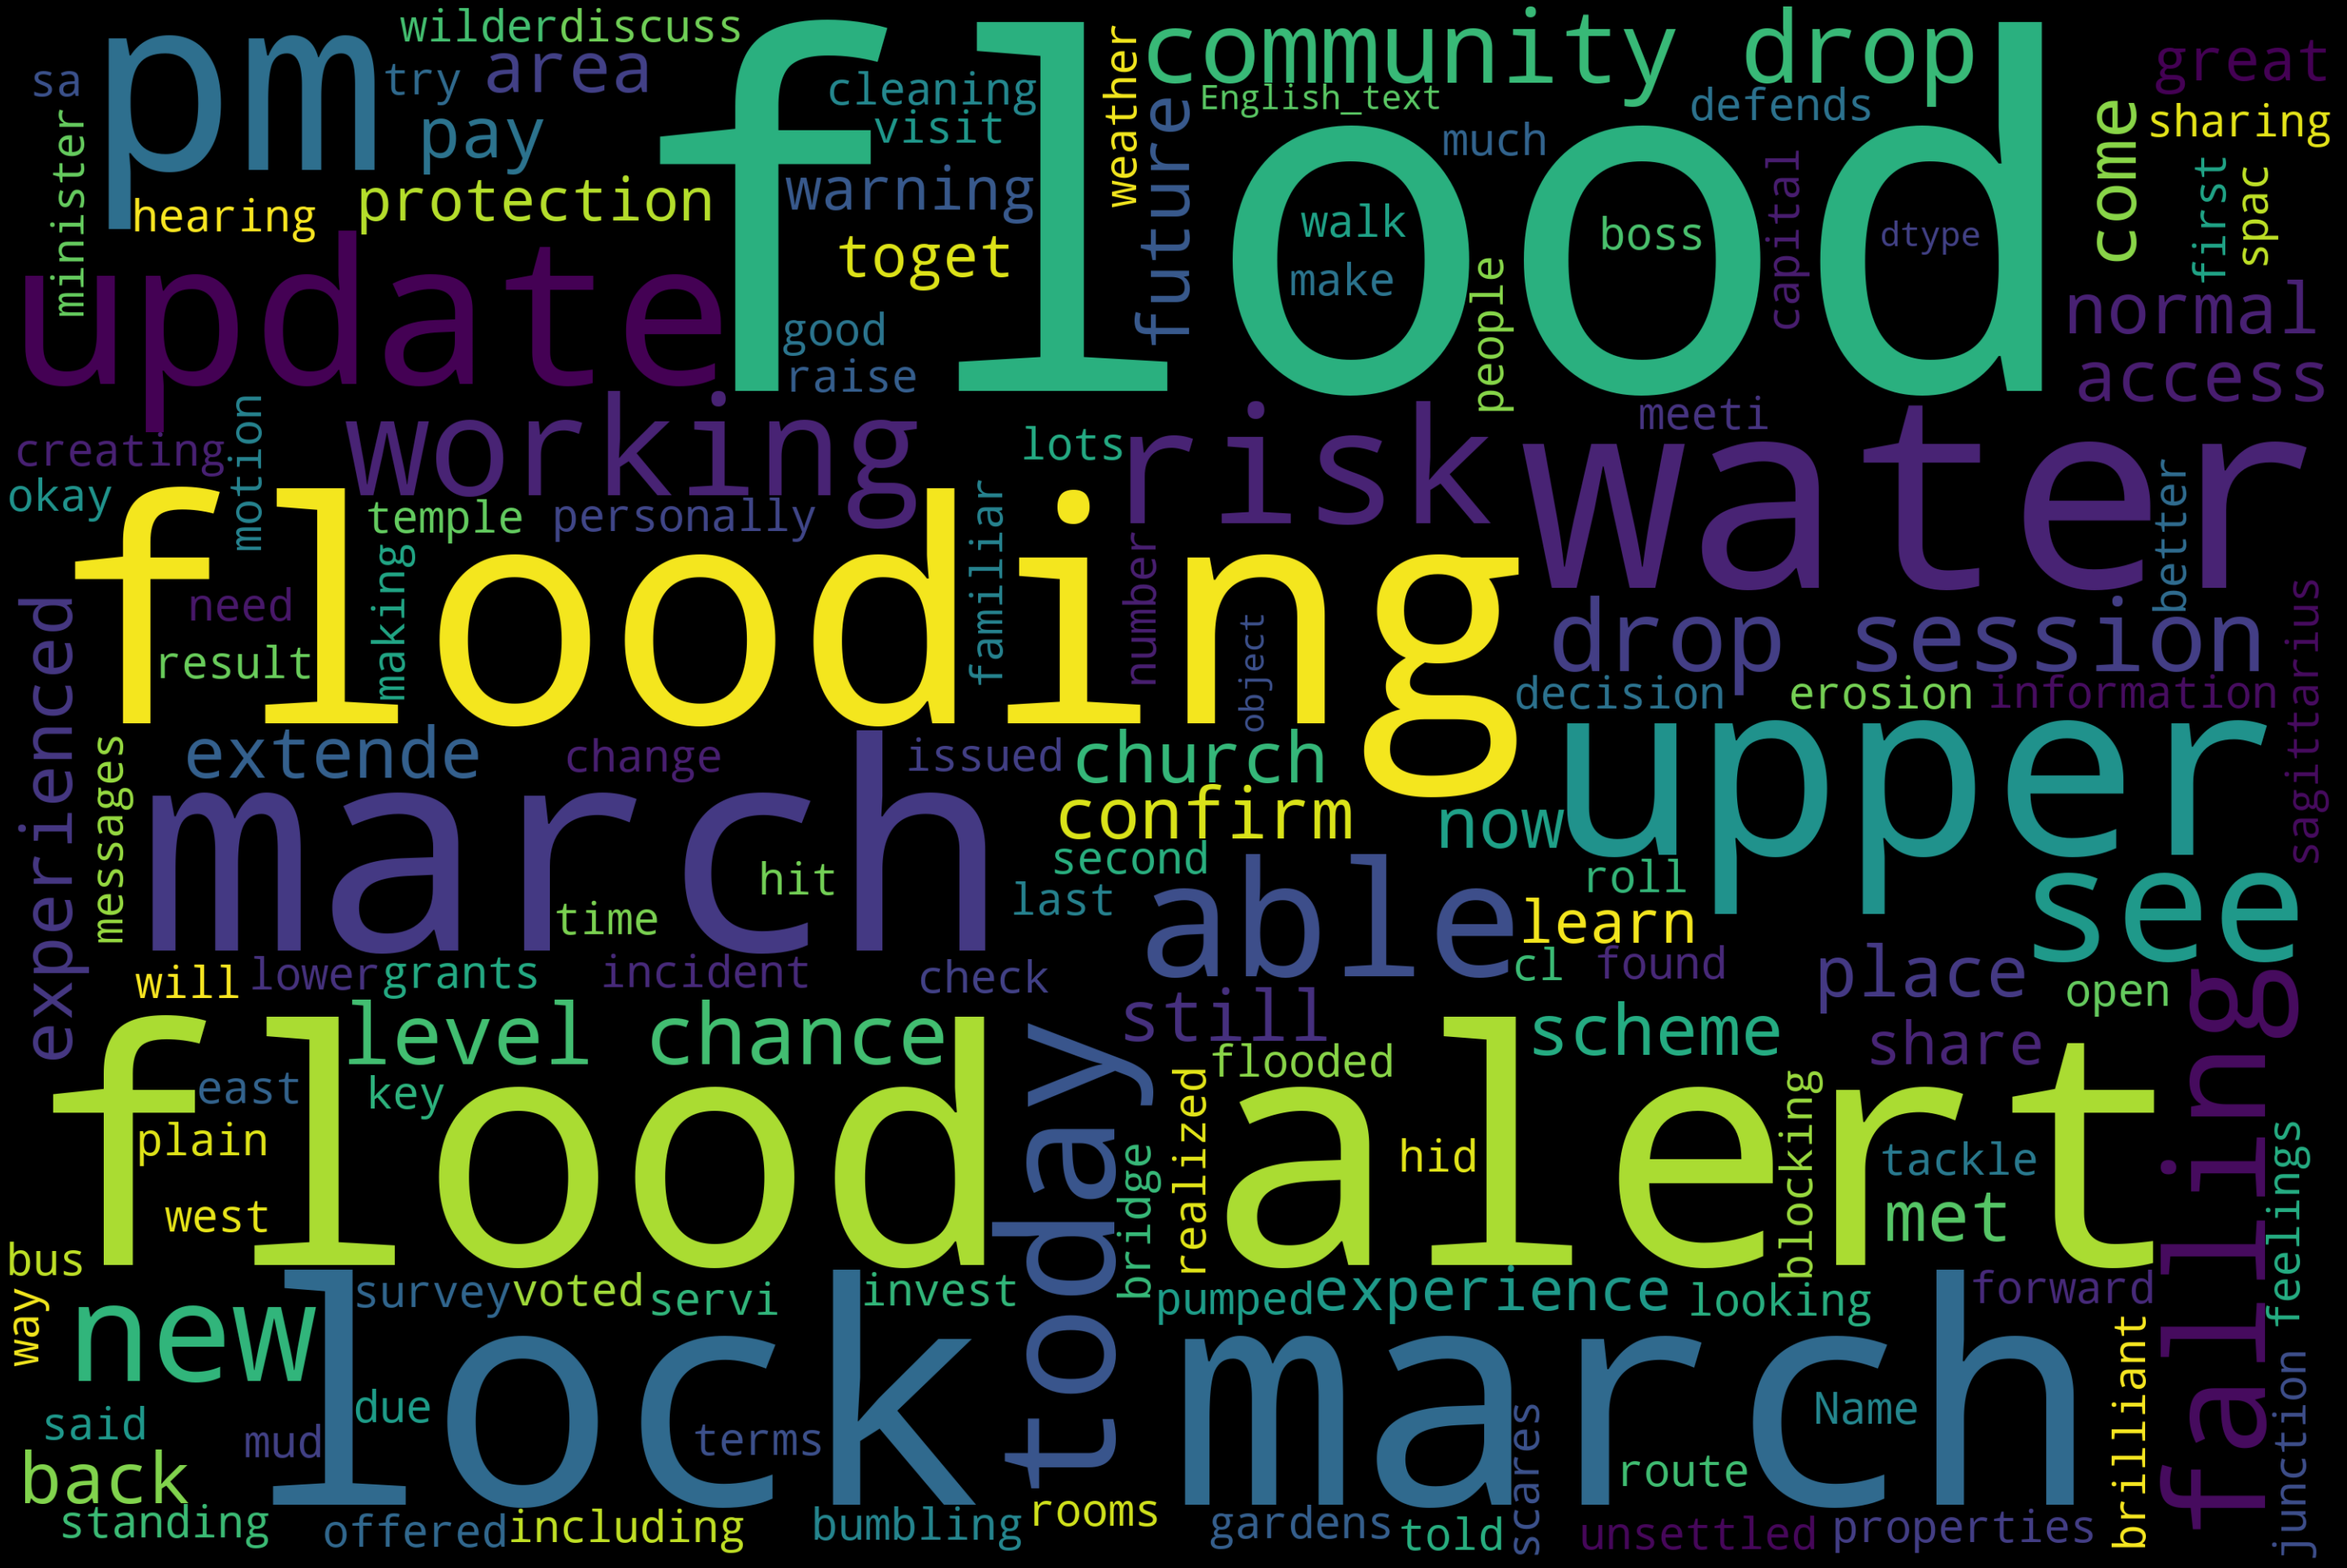

In [23]:
#generate new wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = clean_df.English_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#plt.savefig("wordcloud.png")

### Step 3: most used words in the twitter data¶

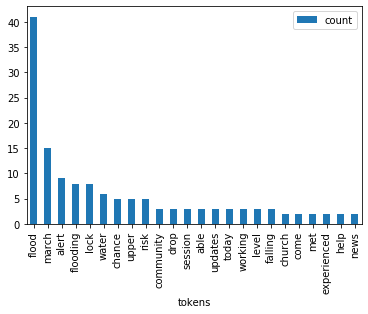

In [18]:
## Inspecting the most common words used in all the observed english tweets
# Breaking into individual words every tweet
def my_tokenizer(text):
    return text.split() if text != None else []
# Breaking all english tweets into individual words and returning a list of these words
tokens = english_df.English_text.map(my_tokenizer).sum()
# most common words in all tweets (stop words included)
counter_wsw = Counter(tokens)
counter_wsw.most_common(20)
# creating a data frame for the most common words with stop words in the tweets for plotting
# >2 to exclude single and doulble lettered words that aren't included among stop words 
word_freq_wsw = pd.DataFrame.from_records([x for x in counter_wsw.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])
# removal of stop words and rechecking the most frequent words
def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]
counter = Counter(remove_stopwords(tokens))
# creating a data frame for the most common words without stop words in the tweets for plotting
word_freq = pd.DataFrame.from_records([x for x in counter.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])
# frequency distribution of the top 19 most used words in the twitter data
word_freq.plot(kind = 'bar', x = 'tokens')

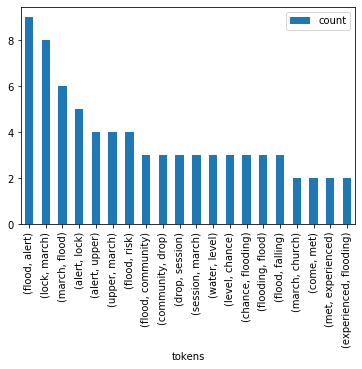

In [19]:
# tokens without stop words and single and double lettered words
tokens_nsw = [x for x in remove_stopwords(tokens) if len(x) > 2]
bigrams = nltk.bigrams(tokens_nsw)
bi_count = Counter(bigrams)
#creating a data frame for the most common words without stop words in the tweets for plotting
bigram_freq = pd.DataFrame.from_records(bi_count.most_common(20), columns = ['tokens', 'count'])
bigram_freq.plot(kind = 'bar', x = 'tokens')

# 3. Visualizaton of geo-tagged tweets
Geo-location is another important feature of social media. Location of social media can be used in understanding urban mobilities, xxx and xxx. In emergency management, social media data can be used as crowdsourcing tool to collect real-time information. In this section, we will subset tweets with geotagged location to identified the effected areas may suffer flood or storms in the early spring 2020. 
Because of the limted time of supervision, we will use pre-collected data (data collected in a week) to demonstrate how to process and visualize geo-location of tweets. 

Data
- wards
- population
- flood 

Process
- ward and population join
- summarise
- calculation
- visualization

1. It is suggested to create a folder and name it as `rm03_YourCRSid_sup2`, at your prefered directory on your disk. This folder will be the working directory for the assignment and supervision.
2. Download dataset (sample data of Sejong, South Korea): Urban_2018.zip, Exclusion_2014.zip, Road_2018.zip, and Boundary.zip in the working directory (you don’t need to unzip).


### QGIS Project Setup (5 mins)

1. In the menu bar, Click `Project` > `New` to create a new QGIS project.
2. Go to `Project` > `Save As` and save as `supervision1.QGZ` to the working directory. 
3. Go to `Project` >  `Properties` and open the `Project Properties` window. 
    - `General` tab: in the general settings, set your working directory as `Project Home`, change the unit for distance measurement you prefer and also display coordinates units.
    - `Metadata` tab: It is suggested to input title, author, creation date and a short abstract in the identification tab.
    - `CRS` tab: this tab provides Coordinate Reference System (CRS) setting for the project file. Here, we choose the projected coordinate system, `OSGB 1936/British National Grid EPSG:27700`. Be aware that CRS setting in the `Project Properties` is just for the project (called `Data Frame setting` in ArcGIS). CRS setting for layers will be introduced later.<br>
Note: after adding `Project home`, you can find `Project Home` directory is showing in the `Browser panel`. It is much easier to locate your data files through this panel.<br>
![](statics/QGIS_general.png)
![](statics/QGIS_metadata.png)
![](statics/QGIS_crs.png) 

### Making heatmap based on their location (5Mins)

- How to import data from spreadsheets and CSV with coordinates?
- How to display coordinates from spreadsheets and CSV in QGIS?

**Importing spreadsheets or CSV files**

1. Download `York_floods_tweets` data of Cambridgeshire from: [Cambridgeshire Insight Open Data](https://data.cambridgeshireinsight.org.uk/dataset/cambridge-local-services/resource/af2c41d1-c8a0-46cf-ab77-ca407732e060){:target="_blank"} and save into your working directory. This is a set of data to be used to geo-locate a shortlist of agencies and facilities around Cambridge.
2. Navigate to menu bar click `Layer` > `Add Layer` > `Add Delimited Text Layer`. Browse the `York_floods_tweets.csv` just downloaded and change the layer name to `York_floods_tweets`. In the section of File Format, choose CSV. In the Geometry Definition section, choose `Point coordinates` and select `Longitude` and `Latitude` fields as X Y fields respectively. Normally the Geometry definition section will be auto-populated if it finds a suitable X and Y coordinate fields. Then choose the right CRS (EPSG:4326 - WGS84) for this file. Finally, click add and you will find a point layer.<br>

![csv](statics/QGIS_csv.png)

**Making heatmap for geotagged tweets**
1. Find `QuickMapServices` function in the `Web` section from the menu bar. Choose `OSM`-`OSM Standard`, and you will add base map in QGIS.

2. Double click the `York_floods_tweets` layer to get in properties dialog.
3. In the Properties dialog, switch to the Style tab. Select `Heatmap` as the renderer. You have a lot of choice of color-ramps for the heatmap.
4. Set `10 millermeter` for radius and click OK.

![heatmap](statics/QGIS_csv.png)

### Using print layout 

**The Layout Manager**

QGIS allows you to create multiple maps using the same map file. For this reason, it has a tool called the Layout Manager.

1. Click on the `Project` -> `Layout Manager` menu entry to open this tool. You’ll see a blank Layout manager dialog appear.
2. Click the Add button and give the new layout the name of `York_floods_tweets_heatmap`.
3. Click OK.
4. Click the Show button.

![layout](statics/Sup_layout.png)

**Basic Map Composition**

In this example, the composition was already the way we wanted it. Ensure that yours is as well.

1. In the Print Layout window, check that the values under Composition ‣ Paper and Quality are set to the following:

```
Size: A4 (210x297mm)
Orientation: Landscape
Quality: 300dpi
```

2. Now you’ve got the page layout the way you wanted it, but this page is still blank. To add the map, click on the `Add New Map` button: ![add_map](statics/Sup3_add_map.png). With this tool activated, you’ll be able to place a map on the page.

3. Click and drag a box on the blank page: ![layout](statics/Sup_layout.png). The map will appear on the page.

4. Move the map by clicking and dragging it around: ![layout](statics/Sup_layout.png)

Note:
- Zoom in and out on the page (but not the map!) by using these buttons ![layout_zoom](statics/Sup3_layout_zoom.png).
- Zoom and pan the map in the main QGIS window. You can also pan the map using the Move item content tool: `move Item Content` ![layout_zoom](statics/Sup3_layout_zoom.png).

Because a Layout in QGIS is part of the main map file, you’ll need to save your main project. Go to the main QGIS window (the one with the Layers panel and all the other familiar elements you were working with before), and save your project from there as usual.

**Adding Map Elements**

Now your map is looking good on the page, but your readers/users are not being told what’s going on yet. They need some context, which is what you’ll provide for them by adding map elements. First, let’s add a title.

**Add Title**
1. Click on this button: label
2. Click on the page, above the map, and a label will appear at the top of the map.
Resize it and place it in the top center of the page. It can be resized and moved in the same way that you resized and moved the map.
3. As you move the title, you’ll notice that guidelines appear to help you position the title in the center of the page.
![title](statics/Sup3_title.png)

**Add North Arrow**
1. Click on this button: label
2. Click on the page, above the map, and a label will appear at the top of the map.
Resize it and place it in the top center of the page. It can be resized and moved in the same way that you resized and moved the map.
3. As you move the title, you’ll notice that guidelines appear to help you position the title in the center of the page.
![arrow](statics/Sup3_arrow.png)

**Add Scale**
1. Click on this button: label
2. Click on the page, above the map, and a label will appear at the top of the map.
Resize it and place it in the top center of the page. It can be resized and moved in the same way that you resized and moved the map.
3. As you move the title, you’ll notice that guidelines appear to help you position the title in the center of the page.
![scale](statics/Sup3_scale.png)

**Add Legend**
1. Click on this button: addLegend
2. Click on the page to place the legend, and move it to where you want it:
![legend1](statics/Sup3_legend1.png)

Not everything on the legend is necessary, so let’s remove some unwanted items.

In the Item Properties tab, you’ll find the Legend items panel.
3. Select the buildings entry.
4. Delete it from the legend by clicking the minus button: signMinus

You can also rename items.Select a layer from the same list.
5. Click the Edit button: edit
6. Rename the layers to Places, Roads and Streets, Surafce Water, and Rivers.
Set landuse to Hidden, then click the down arrow and edit each category to name them on the legend. You can also reorder the items:
![legend2](statics/Sup3_legend2.png)

Adding elements is the basic step for a map. To make a **good** map, you need to do more! Check the [experts' guidence from ESRI](https://www.esri.com/news/arcuser/0911/making-a-map-meaningful.html) illustrating how to make a meaning map by answeing 10 questions. 
![good_map](statics/Sup3_goodmap.png).

**Exporting Your Map**

Finally the map is ready for export! 
1. Find export buttons near the top left corner of the Layout window:
2. Choose `Export as Image`
![map](statics/Sup3_map.png)